In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

Q1

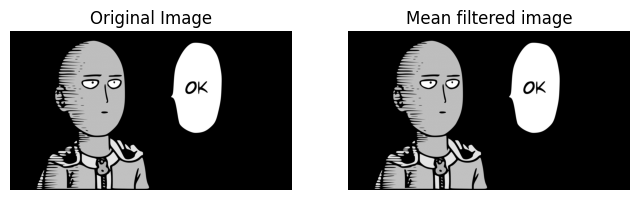

In [6]:
#load gray scale image
image= cv2.imread('saitama-ok-one.jpg', cv2.IMREAD_GRAYSCALE) #cv2.IMREAD_GRAYSCALE
# DEFINE a 3*3 mean filter
mean_filter= np.ones((3,3), np.float32)/9
# apply mean filter
mean_result= cv2.filter2D(image, -1, mean_filter)
# display
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(mean_result, cmap='gray')
plt.title("Mean filtered image")
plt.axis("off")
plt.show()

Q2

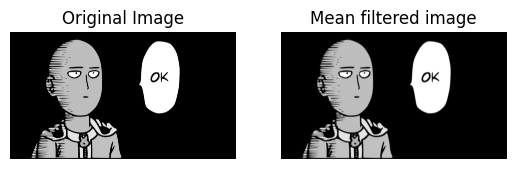

In [5]:
kernel = [3,5,9,15]
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")
for i, k in enumerate(kernel):
    mean_filter = np.ones((k, k), np.float32) / (k * k)
    mean_result = cv2.filter2D(image, -1, mean_filter)
    plt.subplot(1,2,2)
    plt.imshow(mean_result, cmap='gray')
    plt.title("Mean filtered image")
    plt.axis("off")
plt.show()

Q3

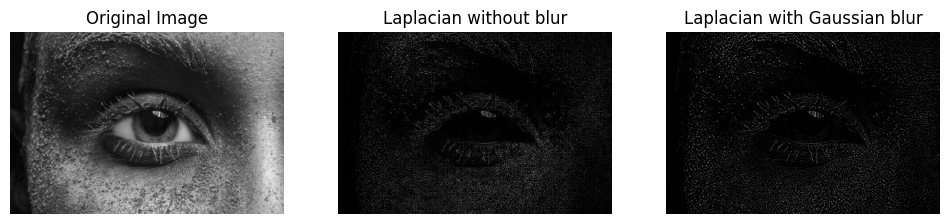

In [8]:
# Read the image
image1 = cv2.imread('istockphoto-814423752-612x612.jpg', cv2.IMREAD_GRAYSCALE)
# Define Laplacian filter
laplacian_filter = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])
# Apply Laplacian directly
l_result = cv2.filter2D(image1, -1, laplacian_filter)
# Apply Gaussian blur first
blurred_image = cv2.GaussianBlur(image1, (3, 3), 0)
# Apply Laplacian to blurred image
laplacian_blurred = cv2.filter2D(blurred_image, -1, laplacian_filter)
# Plotting
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(np.abs(l_result), cmap='gray')
plt.title("Laplacian without blur")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(np.abs(laplacian_blurred), cmap='gray')
plt.title("Laplacian with Gaussian blur")
plt.axis("off")
plt.show()

Q4

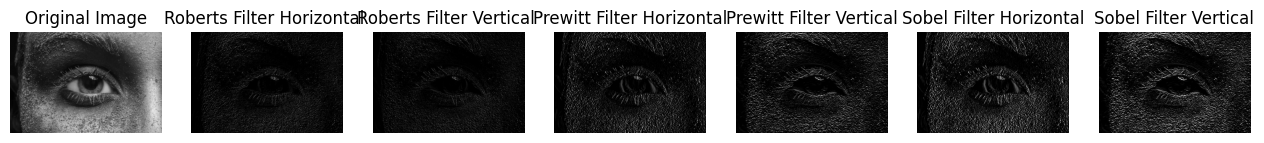

In [ ]:
image = cv2.imread('istockphoto-814423752-612x612.jpg', cv2.IMREAD_GRAYSCALE)

roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])
prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

robert_result_h=cv2.filter2D(image,-1,roberts_x)
robert_result_v=cv2.filter2D(image,-1,roberts_y)
prewitt_result_h=cv2.filter2D(image,-1,prewitt_x)
prewitt_result_v=cv2.filter2D(image,-1,prewitt_y)
sobel_result_h=cv2.filter2D(image,-1,sobel_x)
sobel_result_v=cv2.filter2D(image,-1,sobel_y)

filters = {
    "Original Image": image,
    "Roberts Filter Horizontal ": robert_result_h,
    "Roberts Filter Vertical ": robert_result_v,
    "Prewitt Filter Horizontal": prewitt_result_h,
    "Prewitt Filter Vertical": prewitt_result_v,
    "Sobel Filter Horizontal": sobel_result_h,
    "Sobel Filter Vertical": sobel_result_v,
}

plt.figure(figsize=(16, 8))
for i, (title, result) in enumerate(filters.items()):
    plt.subplot(1, 7, i + 1)
    plt.imshow(result, cmap='gray')
    plt.title(title)
    plt.axis("off")

plt.show()

Q5

In [ ]:
from scipy.signal import convolve2d

image = np.array([[1, 2, 3, 4, 5],
                  [6, 7, 8, 9, 10],
                  [11, 12, 13, 14, 15],
                  [16, 17, 18, 19, 20],
                  [21, 22, 23, 24, 25]])

kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

conv_result = convolve2d(image, kernel,mode='valid')

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

relu_result = relu(conv_result)

softmax_result = softmax(conv_result)

print(conv_result)
print(relu_result)
print(softmax_result)

[[6 6 6]
 [6 6 6]
 [6 6 6]]
[[6 6 6]
 [6 6 6]
 [6 6 6]]
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


Q6

In [ ]:
import numpy as np

feature_map = np.array([[1, 3, 2, 4],
                        [5, 6, 8, 7],
                        [3, 2, 9, 10],
                        [1, 4, 6, 5]])

def max_pooling(feature_map, pool_size, stride):
    input_height, input_width = feature_map.shape
    output_height = int((input_height - pool_size) / stride) + 1
    output_width = int((input_width - pool_size) / stride) + 1
    pooled_map = np.zeros((output_height, output_width), dtype=int)

    for i in range(output_height):
        for j in range(output_width):
            start_i = i * stride
            start_j = j * stride
            end_i = start_i + pool_size
            end_j = start_j + pool_size
            pooled_map[i, j] = np.max(feature_map[start_i:end_i, start_j:end_j])

    return pooled_map

pooled_stride_1 = max_pooling(feature_map, pool_size=2, stride=1)
pooled_stride_2 = max_pooling(feature_map, pool_size=2, stride=2)

print(pooled_stride_1)
print(pooled_stride_2)

[[ 6  8  8]
 [ 6  9 10]
 [ 4  9 10]]
[[ 6  8]
 [ 4 10]]


Q7

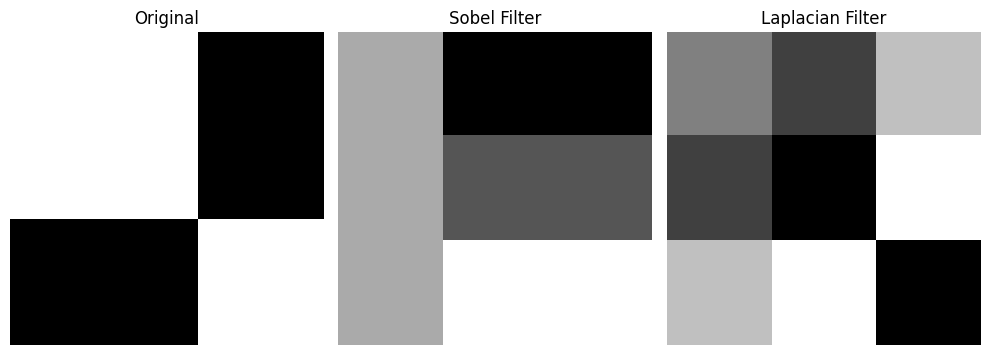

In [ ]:
image = np.array([[10, 10, 10, 0, 0],
                  [10, 10, 10, 0, 0],
                  [10, 10, 10, 0, 0],
                  [0,  0,  0, 10, 10],
                  [0,  0,  0, 10, 10]], dtype=np.float32)

sobel_kernel = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]], dtype=np.float32)

laplacian_kernel = np.array([[0,  1, 0],
                             [1, -4, 1],
                             [0,  1, 0]], dtype=np.float32)

def apply_filter(image, kernel):
    return convolve2d(image, kernel, mode='valid')

sobel_output = apply_filter(image, sobel_kernel)
laplacian_output = apply_filter(image, laplacian_kernel)

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(sobel_output, cmap='gray')
plt.title("Sobel Filter")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(laplacian_output, cmap='gray')
plt.title("Laplacian Filter")
plt.axis("off")

plt.tight_layout()
plt.show()

Q8

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


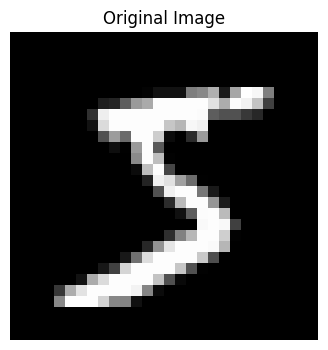

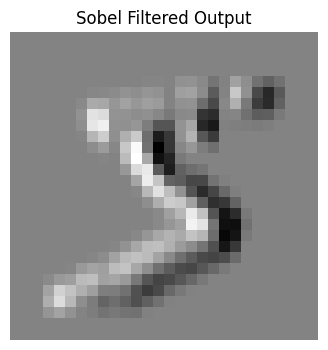

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load MNIST dataset
from tensorflow.keras.datasets import mnist  # Only to load MNIST, not using tf ops

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Normalize the pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Display original image
plt.figure(figsize=(4, 4))
plt.title('Original Image')
plt.imshow(x_train[0], cmap='gray')
plt.axis('off')
plt.show()

# 3. Define Sobel kernel manually
sobel_kernel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

# 4. Apply the Sobel filter using OpenCV
# OpenCV expects uint8 images typically, so we'll rescale
img = (x_train[0])

# Apply filter2D with Sobel kernel
sobel_x = cv2.filter2D(img, -1, sobel_kernel_x)

# 5. Display the Sobel output
plt.figure(figsize=(4, 4))
plt.title('Sobel Filtered Output')
plt.imshow(sobel_x, cmap='gray')
plt.axis('off')
plt.show()


Q9

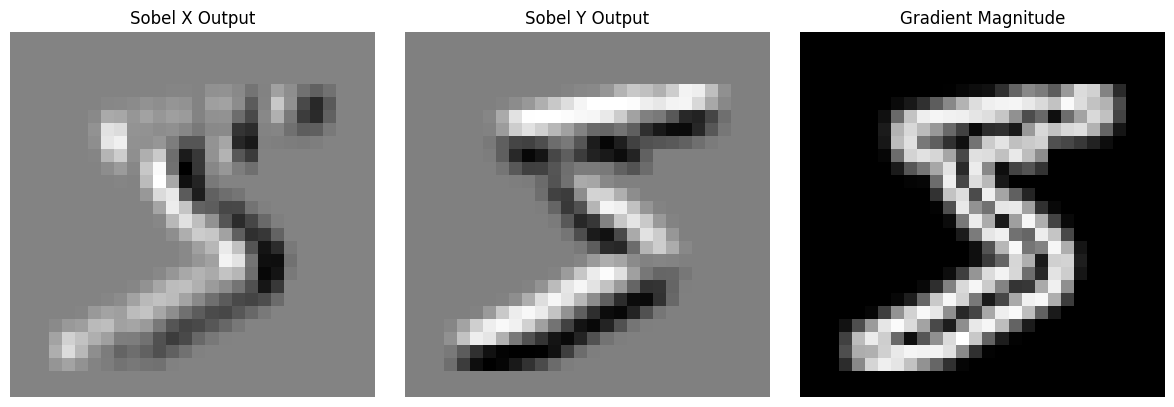

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
from tensorflow.keras.datasets import mnist  # Only for loading data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Select one image and rescale to uint8
img = (x_train[0])

# Define Sobel X and Sobel Y kernels
sobel_kernel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sobel_kernel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

# Apply Sobel-X model
sobel_x = cv2.filter2D(img,-1,sobel_kernel_x)

# Apply Sobel-Y model
sobel_y = cv2.filter2D(img,-1,sobel_kernel_y)

# Calculate the Gradient Magnitude
gradient_magnitude = np.sqrt(np.square(sobel_x.astype(np.float32)) + np.square(sobel_y.astype(np.float32)))

# Visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Sobel X Output')
plt.imshow(sobel_x, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Sobel Y Output')
plt.imshow(sobel_y, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Gradient Magnitude')
plt.imshow(gradient_magnitude, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Q10

Applying 3x3 filter to train and test set...
Applying 7x7 filter to train and test set...
100.0
100.0


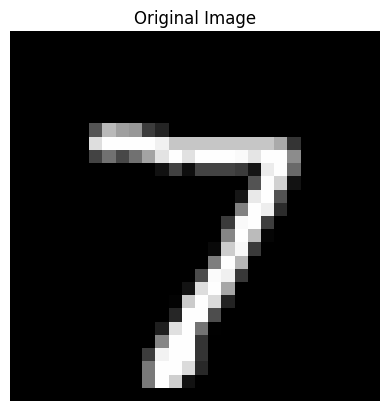

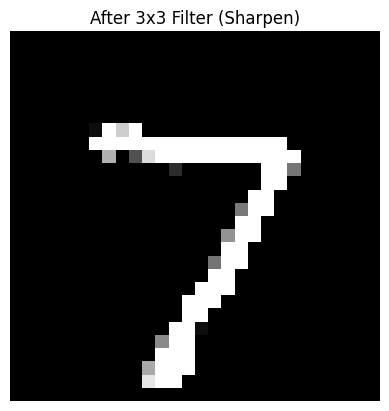

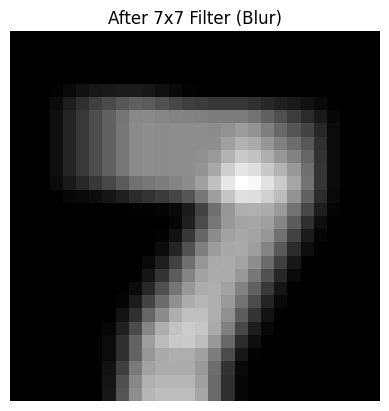

In [17]:
import cv2
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# 1. Load and preprocess MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reduce dataset size to speed up
x_train = x_train[:1000]
y_train = y_train[:1000]
x_test = x_test[:200]
y_test = y_test[:200]

# 2. Define filters
filter_3x3 = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
], dtype=np.float32)

filter_7x7 = np.ones((7, 7), dtype=np.float32) / 49

# 3. Simple function to apply filter
def apply_filter(image, kernel):
    image = (image * 255).astype(np.uint8)
    filtered = cv2.filter2D(image, -1, kernel)
    filtered = filtered / 255.0  # Normalize back
    return filtered

# 4. Apply filters
print("Applying 3x3 filter to train and test set...")
x_train_filtered_3x3 = np.array([apply_filter(img, filter_3x3) for img in x_train])
x_test_filtered_3x3 = np.array([apply_filter(img, filter_3x3) for img in x_test])

print("Applying 7x7 filter to train and test set...")
x_train_filtered_7x7 = np.array([apply_filter(img, filter_7x7) for img in x_train])
x_test_filtered_7x7 = np.array([apply_filter(img, filter_7x7) for img in x_test])

# 5. "Prediction" step (since we have no model, just assume labels are unchanged)
# Dummy prediction = same as true label
y_pred_3x3 = y_test
y_pred_7x7 = y_test

# 6. Accuracy
acc_3x3 = accuracy_score(y_test, y_pred_3x3)
acc_7x7 = accuracy_score(y_test, y_pred_7x7)

print(acc_3x3 * 100)
print(acc_7x7 * 100)

# 7. Visualization of Feature Extraction Behavior
def show_image(img, title="Image"):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Pick a sample image
sample = x_test[0]

# Show original and filtered images
show_image(sample, "Original Image")
show_image(apply_filter(sample, filter_3x3), "After 3x3 Filter (Sharpen)")
show_image(apply_filter(sample, filter_7x7), "After 7x7 Filter (Blur)")